# **AP155 Lab Assignment** 
## Module 4: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 3 are worth 20, 30, and 50 points, respectively).

_Due Date_: **5PM of November 23 (Tue)**


### Student Information 

_Full Name (Last Name, First Name)_: Salinas, Jose Enrico\
_Student No._: 201808184\
_Section_: THX2

In [1]:
# !pip install pytz
from datetime import datetime
from pytz import timezone
print("Last run: ", datetime.now(timezone("Asia/Manila")).strftime("%m/%d/%Y, %H:%M:%S"))

Last run:  11/23/2022, 12:49:37


### Submission Information


**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** SALINAS, Jose Enrico

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **91**/100

Score breakdown:
* Problem 1 - 19/20
* Problem 2 - 27/30
* Problem 3 - 45/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount("/content/drive")

file_path = "/content/drive/My Drive/datasets/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### PROBLEM 1 (20 pts.; 50/50 for code & discussion) 
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) \sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(10 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(10 pts.)*


We want to find the DFT of the function

$y(n)=\sin(\frac{\pi n}{N})\sin(\frac{20\pi n}{N})$ for $N=1000$ and $n\in[0, 1000]$

\
To start, we simply define the function and evaluate it on the range of $n$. We can plot it on the same interval to get some idea of the result. The function appears to have a definite frequency so we expect a larger value on this frequency on the plot of the Fourier transform and negligible values elsewhere.

In [4]:
def f(n, N):
  return np.sin(np.pi*n/N)*np.sin(20*np.pi*n/N)

N = 1000
n = np.arange(0, N)
y = f(n, N)

Text(0, 0.5, '$y_n$')

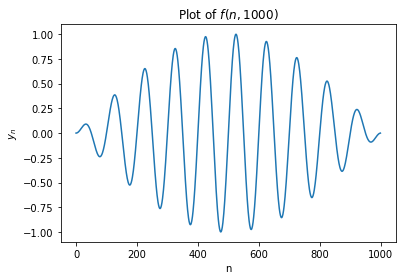

In [5]:
fig, ax = plt.subplots()
sns.lineplot(x=n, y=y, ax=ax)
ax.set_title("Plot of $f(n, 1000)$")
ax.set_xlabel("n")
ax.set_ylabel("$y_n$")

Then, we define the function for the Discrete Fourier Transform. This function returns $\frac{N}{2}+1$ Fourier constants from $N$ real samples.

In [6]:
def dft(y):
  N = len(y)
  c = np.zeros(N//2+1, complex)

  for k in range(N//2+1):
    for n in range(N):
      c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)

  return c

Then, we simply call the `dft` function and take the absolute values of the result to create the plot of the Fourier transform. This result is as expected.

In [7]:
fft_y = np.abs(dft(y))

Text(0, 0.5, '$c_n$')

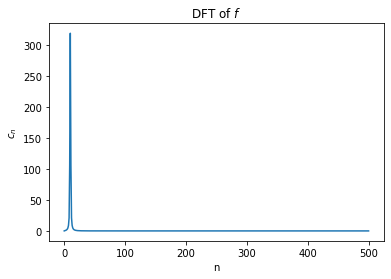

In [8]:
fig, ax = plt.subplots()
sns.lineplot(x=n[:501], y=fft_y, ax=ax)
ax.set_title("DFT of $f$")
ax.set_xlabel("n")
ax.set_ylabel("$c_n$")

##### Comments - Leo

- What is the frequency (k = 10)
- **Score: 19/20**

### PROBLEM 2 (30 pts.; 50/50 for code & discussion)

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the General > Datasets folder) and directly from this link: https://drive.google.com/file/d/1CHXGF2s9HvKJPTVRWeq5tJpgFxYuOgOg/view?usp=sharing

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(5 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(10 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(5 pts.)* 

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(10 pts.)*

The DOW measures the stock prices of 30 notable US based companies. Since stock prices are naturally volatile, so is the DOW. To better observe patterns in the DOW, we can get a clearer picture by smoothing the data. To start, we load the dataset.

In [9]:
dow = np.loadtxt(file_path+"dow.txt")
print(dow[0:10])
print(dow.shape)

[12121.71 12136.44 12226.73 12221.93 12194.13 12283.85 12331.6  12309.25
 12278.41 12307.48]
(1024,)


Inspection shows its a 1-D array of the closing values. The dates have been omitted. Nonetheless, we can plot this as a time series as shown.

Text(0, 0.5, 'Closing Value')

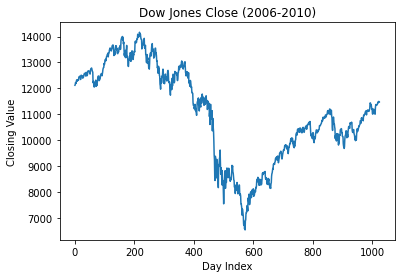

In [10]:
x = np.arange(0, dow.shape[0])

fig, ax = plt.subplots()
sns.lineplot(x=x, y=dow, ax=ax)
ax.set_title("Dow Jones Close (2006-2010)")
ax.set_xlabel("Day Index")
ax.set_ylabel("Closing Value")

The DOW is indeed volatile. While a larger trend is apparent, there's little we can say for shorter time periods. To fix this, we can apply a filter consisting as follows:

We take the discerete fourier transform of the DOW series `numpy.fft.rfft`. Since we have 1024 datapoints, this will give us $\frac{N}{2}+1$ or 513 complex values. These are the coefficients of the fourier series approximating the DOW.

In [11]:
fft_dow = np.fft.rfft(dow)
fft_dow.shape

(513,)

We then zero all but the first 51 coefficients. This removes the terms with frequencies higher than $\frac{2\pi n}{N}$ from the fourier series. We can then apply the discrete inverse fourier transform using `numpy.fft.irfft` on the lower frequency coefficients.

In [12]:
fft_dow[51: -1] = np.zeros(461)
y_ifft = np.fft.irfft(fft_dow)

The next effect of the filter is a smoothed function. Patterns in the DOW are more likely to be represented by lower frequency terms. Noise is more likely to be represented by higher frequency terms. So removing higher frequency terms smooths the function and makes shorter-term patterns more apparent while preserving most of the information.

Text(0, 0.5, 'Dow Jones Close')

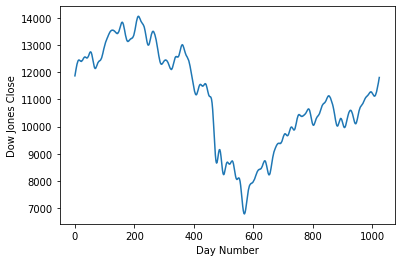

In [13]:
x = np.arange(0, len(y_ifft))
y = y_ifft

fig, ax = plt.subplots()
sns.lineplot(x=x, y=y, ax=ax)
ax.set_title("")
ax.set_xlabel("Day Number")
ax.set_ylabel("Dow Jones Close")

##### Comments - Leo

- Labels are missing, should've ovelayed the raw data to the filtered one
- **Score: 27/30**

### PROBLEM 3 (50 pts.; 50/50 for code & discussion)

**Real-world Application: Image deconvolution**

_Refer to Exercise 7.9 of the Newman text_ For this problem, you will use data from a text file called $\tt blur.txt$. It contains a grid of values representing brightness on a black-and-white photo-- a badly out-of-focus one that has been deliberately blurred using a Gaussian point spread function of width $\sigma = 25$. 

Similar to what you did for Problem 2, you need to make a copy of the file $\tt blur.txt$ and save it to the same folder in your **own Google Drive** where you saved $\tt dow.txt$. This file is available from the AP155 Course Pack Google Drive (in the General > Datasets folder) and directly from this link: https://drive.google.com/file/d/1CHXGF2s9HvKJPTVRWeq5tJpgFxYuOgOg/view?usp=sharing

1. Use numpy's $\tt loadtxt$ to load the grid of values into a two-dimensional array of real numbers, e.g.:
```
blur = np.loadtxt(file_path+"blur.txt")
``` 
Plot the values on the screen of the computer as a density plot. (Hint: Use $\tt imshow$ and $\tt show$ from the pylab package.) You should see the photo appear. If you get something wrong it might be upside-down. Work with the details of your program until you get it appearing correctly. (Hint: The picture has the sky, which is bright, at the top and the ground, which is dark, at the bottom.) *(10 pts.)*

2. Create an array of the point spread function (PSF), of the same size as the photo, based on the Gaussian function $f(x,y) = exp\left(-\frac{x^2+y^2}{2\sigma^2}\right)$. In particular, get the sum of 4 Gaussians with $\sigma = 25$ centered on each of the four corners of the image. _Refer to the figure on page 325 of the Newman text._ *(10 pts.)*

3. Make a density plot of these values on the screen, so that you get a visualization of your point spread function. *(10 pts.)*

3. Apply Fourier transforms using the functions $\tt rfft2$ and $\tt irfft2$ from numpy's $\tt fft$ package to perform image deconvolution as follows:

* Get Fourier transforms of both the blurred image and the PSF from (1) and (2) 
* Divide one by the other
* Perform an inverse transform to get the unblurred photo
* Display the unblurred photo on the screen

When you are done, you should be able to make out the scene in the photo, although probably it will still not be perfectly sharp. *(20 pts.)*

   Hint: One thing you'll need to deal with is what happens when the Fourier transform of the point spread function is zero, or close to zero. In that case if you divide by it you'll get an error (because you can't divide by zero) or just a very
large number (because you're dividing by something small). A workable compromise is that if a value in the Fourier transform of the point spread function is smaller than a certain amount $\epsilon$ you don't divide by it-- just leave that coefficient alone. The value of $\epsilon$ is not very critical but a reasonable value seems to be $10^{-3}$. 

We can use the DFT to sharpen images if we can approximate some function that representing the noise. We demonstrate this using an image that was blurred using a Gaussian point spread function. We load and plot it below. The image is a 1024 by 1024 pixel image.

In [14]:
blur = np.loadtxt(file_path+"blur.txt")
blur.shape

(1024, 1024)

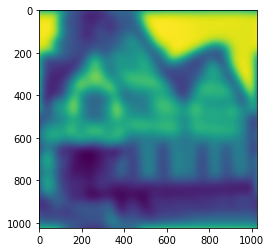

In [15]:
fig, ax = plt.subplots()
plt.imshow(blur)

Since we know the function used to blur the image, we can just define it explicity. After that, we use `np.mgrid` to construct a 1024 by 1024 array to create the Gaussian point plots.

In [16]:
def psf(x, y, mux, muy, sigma):
  return np.exp(-((x-mux)**2+(y-muy)**2)/(2*sigma**2))

In [17]:
grid = np.mgrid[0:1024, 0:1024]
y, x = grid[0], grid[1]

Since `psf` is already vectorized, we can just construct the Gaussian point distributions. The plots are centered at the four corners of the image with a $\sigma=25$. To get the kernel, we take the sum of the four plots. To verify the result, we plot the kernel.

In [18]:
gauss_1 = psf(x, y, 0, 0, 25)
gauss_2 = psf(x, y, 1023, 0, 25)
gauss_3 = psf(x, y, 0, 1023, 25)
gauss_4 = psf(x, y, 1023, 1023, 25)

gauss = gauss_1 + gauss_2 + gauss_3 + gauss_4

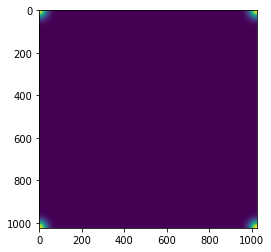

In [19]:
fig, ax = plt.subplots()
plt.imshow(gauss)

A Gaussian blur is done by first taking the Fourier transform of a 2-D Gaussian kernel and multiplying it with the Fourier transform of the image. After that, the inverse Fourier transform is taken to complete the filter. To unblur the image, we simply reverse the process. 

We start by taking the Fourier transform of our kernel and the input image using `numpy.fft.rfft2`.

In [20]:
fft_blur = np.fft.rfft2(blur)
fft_gauss = np.fft.rfft2(gauss)

We reverse the mutiplication by dividing `fft_blur` with `fft_gauss`. However, `fft_gauss` can be zero or below acceptable division precision which will cause an error. To avoid this, we can set relatively small values of `fft_gauss` to 1. This will effectively ignore the division for small values of `fft_gauss`.

After that, we perform the division and take the inverse to complete the unblurring process.

In [21]:
epsilon = 10e-3
fft_gauss[fft_gauss < epsilon] = 1

In [22]:
inverse_map = fft_blur/fft_gauss
clear = np.fft.irfft2(inverse_map)

Plotting the result gives us a slightly sharper image. Although the image is not clear enough to see fine details, we can at least see that it is a house.

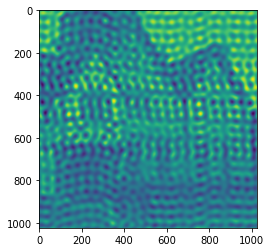

In [23]:
fig, ax = plt.subplots()
plt.imshow(clear)

##### Comments - Leo

- For the epsilon, should be 1e-3 or 10**-3 not 10e-3
- Only plot the real term of the inverse fourier (so you must have specified from the very beginning that your matrix is a complex one). This will give you a clearer image
- **Score: 45/50**